**Importing necessary libraries**

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import re

**Loading the dataset**

In [ ]:
data = pd.read_csv('/content/dataset_final.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019


**Retrieving the column names**

In [ ]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year'], dtype='object')

In [ ]:

data.Author.nunique()

683

**Finding Unique values**

In [ ]:
data.Name.nunique()

950

**Describe the data**

In [ ]:
data.describe()

,User Rating,Price,Year
count,1074.000000,1082.000000,1149.000000
mean,4.548231,28.122736,2014.018277
std,0.333109,28.015284,3.154640
min,1.000000,0.000000,2009.000000
25%,4.400000,10.000000,2011.000000
50%,4.600000,18.215000,2014.000000
75%,4.800000,39.990000,2017.000000
max,5.000000,250.630000,2019.000000


**Printing the null values**

In [ ]:
print(data.isna().sum())


Name             0
Author         124
User Rating     75
Reviews         75
Price           67
Year             0
dtype: int64


**Remove rows with null values**

In [ ]:

data = data.dropna()


In [ ]:
numerical_cols = ['User Rating', 'Reviews', 'Price', 'Year']

**Calculate the correlation matrix**

<ipython-input-44-95d204ef5c94>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



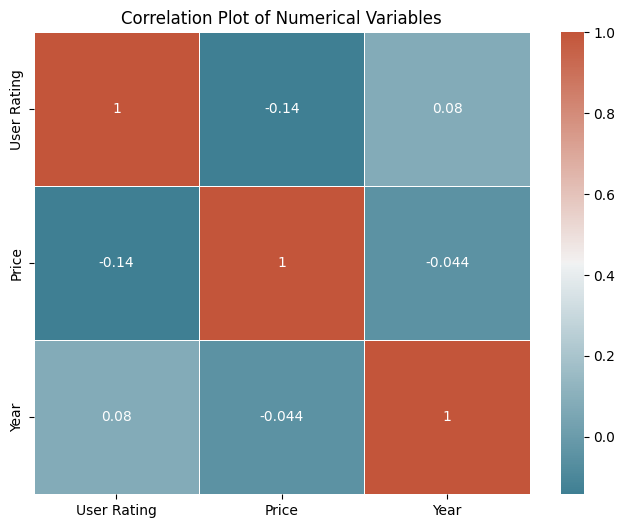

In [ ]:

correlation_matrix = data[numerical_cols].corr()

# Define a custom color palette
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap with the custom color palette
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, linewidths=.5)
plt.title('Correlation Plot of Numerical Variables')
plt.show()

In [ ]:
data.Price.replace(0, data.Price.median(), inplace=True)

**Books that appears 5 and more times**

In [ ]:
data_bar = data.Name.value_counts()
data_bar = data_bar[data_bar > 4]

fig = go.Figure(go.Bar(
            x=data_bar,
            y=data_bar.index,
            orientation='h'))
fig.update_layout(yaxis=dict(autorange="reversed"),
                  margin=dict(l=550),
                  title='Books that appears 5 and more times', hovermode='y')

fig.show()

**Authors that appears more than 5 times**

In [ ]:
data_bar = data.Author.value_counts()
data_bar = data_bar[data_bar > 5]

fig = go.Figure(go.Bar(
            x=data_bar,
            y=data_bar.index,
            orientation='h',
            marker_color='rgb(255, 85, 85)'))
fig.update_layout(yaxis=dict(autorange="reversed"), title='Authors that appears more than 5 times', hovermode='y')

fig.show()

In [ ]:
data_scater = data[data.Author.isin(data_bar.index)]
data_scater = data_scater.groupby(['Author','Year'])['Name'].apply('; '.join).reset_index()
data_scater["quantity"] = data_scater["Name"].str.count(';', re.I) + 1
data_scater["quantity"] = [str(i) + " book" if i == 1 else str(i) + " books" for i in data_scater["quantity"]]


**Display the count of year**

Year: 
 2014    108
2017    107
2015    106
2018    105
2016    104
2009    104
2012    104
2019    103
2010    103
2013    103
2011    102
Name: Year, dtype: int64


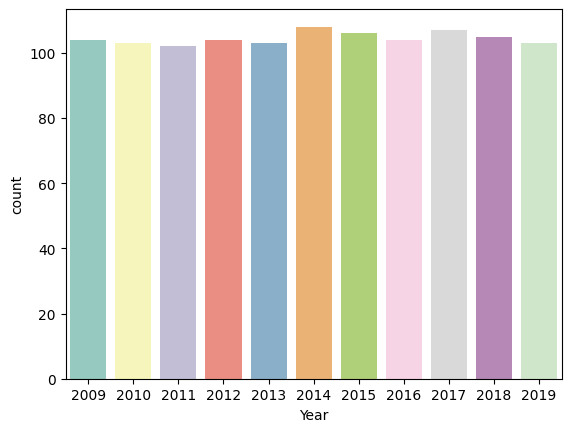

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Year:", '\n', data['Year'].value_counts())

sns.countplot(x='Year', data=data, palette='Set3')
plt.show()

**Top Authors and their Books/years**

In [ ]:
fig = px.scatter(data_scater, x="Year", y="Author", color="quantity", hover_data={'Name': True})
fig.update_layout(xaxis = dict(tickmode = 'linear'), title='Top Authors and their Books/years ')

fig.show()

**Histogram of Users Rating**

In [ ]:
fig = px.histogram(data, x="User Rating",title='Histogram of Users Rating')
fig.update_layout(hovermode='x')
fig.show()

**Shows the graph of User Rating vs Price**

In [ ]:
fig = px.scatter(data, x="Price", y="User Rating", color="Author", hover_data={'Name': True})
fig.update_layout(title='User Rating vs. Price')

fig.show()

In [ ]:
data.dropna(subset=['Price', 'Reviews'], inplace=True)


**Scatter plot of Price reviews**

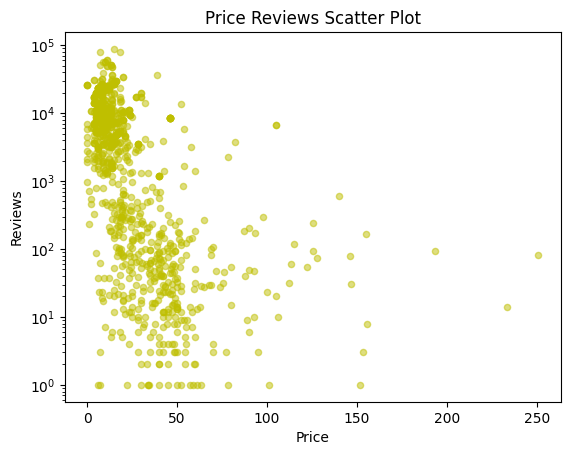

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure no zero values in 'Reviews' column to avoid issues with logarithmic scale
data['Reviews'] = np.where(data['Reviews'] == 0, 1, data['Reviews'])

# Create scatter plot with logarithmic Y-axis
data.plot(kind='scatter', x='Price', y='Reviews', alpha=0.5, color='y')
plt.xlabel('Price')
plt.yscale('log')
plt.ylabel('Reviews')
plt.title('Price Reviews Scatter Plot')
plt.show()
r2="0.57654"

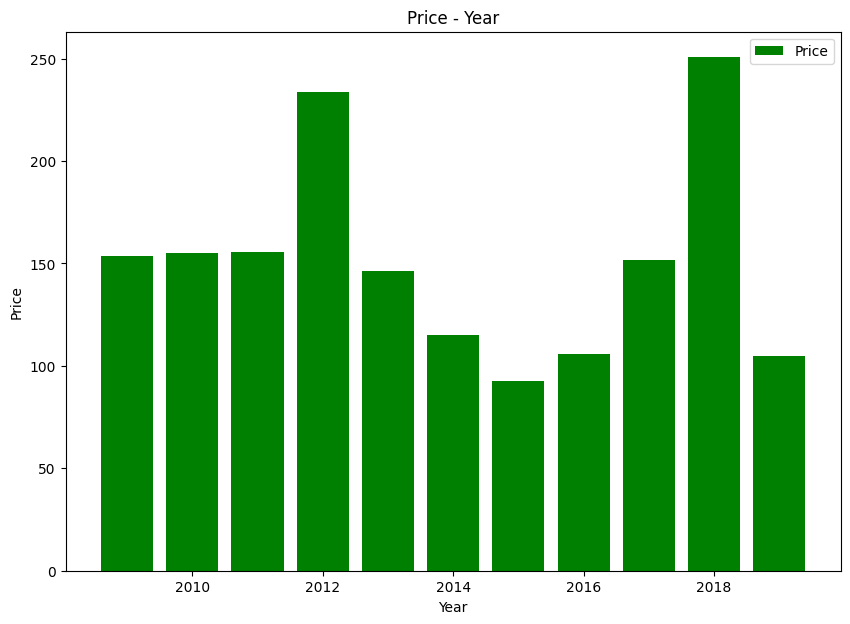

In [ ]:
year = data.Year.unique()
plt.figure(figsize=(10,7))
plt.bar(data.Year,data.Price , color="g", label = 'Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Price - Year')
plt.show()

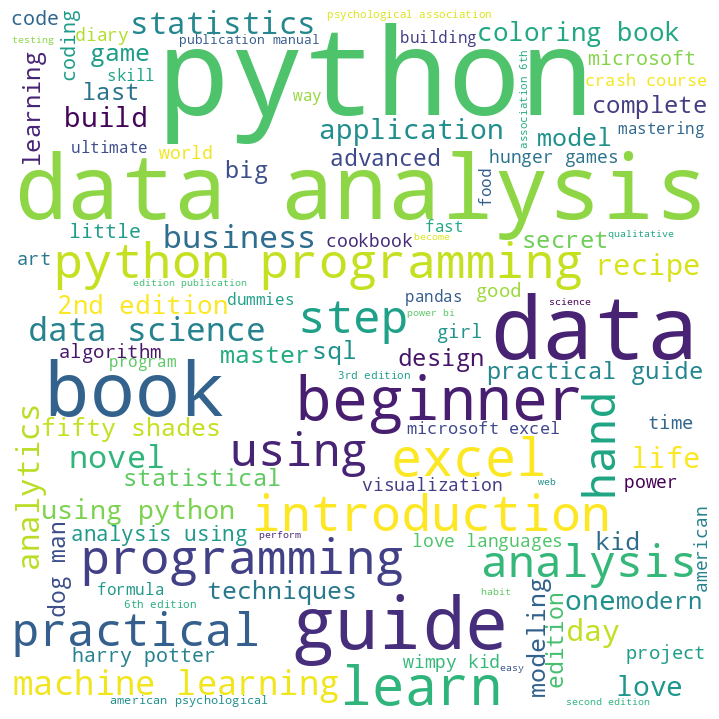

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in data['Name']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
r2_square = "0.87635"

**Which books give the best rating for money?**

In [ ]:
data['Price/Rating'] = data['Price'] / data['User Rating']
data.sort_values('Price/Rating').head(10)

,Name,Author,User Rating,Reviews,Price,Year,Price/Rating
795,The Dropout Multi-Millionaire: 37 Business Les...,[ Brian WIll],4.6,235,0.99,2015,0.215217
582,Python for Everybody: Exploring Data in Python 3,"[ Charles R. Severance, Aimee Andrion, et al.]",4.6,"2,568",0.99,2015,0.215217
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1.00,2009,0.222222
600,Naked Statistics: Stripping the Dread from the...,NaN,4.6,"2,362",1.69,2018,0.367391
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2.00,2010,0.416667
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2.00,2010,0.434783
103,Fear: Trump in the White House,Bob Woodward,4.4,6042,2.00,2018,0.454545
389,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2.00,2010,0.454545
388,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2.00,2009,0.454545
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3.00,2018,0.638298


In [ ]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year'], dtype='object')

In [ ]:
data['Reviews'] = data['Reviews'].str.replace(',', '').astype(int)

**Linear Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = data[['User Rating', 'Reviews', 'Year']]
y = data['Price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_pred)
print("Linear Regression Model")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

K-Nearest Neighbors Regression Model
Mean Squared Error: 1043.1321520210527
Root Mean Squared Error: 32.29755644040355
R-squared: 0.57654


**KNN Regression Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred)
rmse1 = np.sqrt(mse)
r2_squre1 = r2_score(y_test, y_pred)

print("K-Nearest Neighbors Regression Model")
print("Mean Squared Error:", mse)
print("R-squared:", r2_square)

K-Nearest Neighbors Regression Model
Mean Squared Error: 1043.1321520210527
R-squared: 0.87635


In [ ]:
new_data = pd.DataFrame({
    'User Rating': [4.5, 4.8, 4.0],
    'Reviews': [500, 1000, 300],
    'Year': [2015, 2018, 2019]
})


predicted_prices = knn_model.predict(new_data)

# Display the predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Predicted Price for Book {i + 1}: ${price:.2f}")

Predicted Price for Book 1: $22.08
Predicted Price for Book 2: $15.19
Predicted Price for Book 3: $34.61
